# Labolatorium 2

importowanie bibliotek

In [1]:
import time
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette("bright")

In [2]:
SAVE_PLOTS=True

In [3]:
if SAVE_PLOTS:
    os.makedirs("./plots",exist_ok=True)
    directory="./plots/"

# Zadanie 1

Przygotuj program generujący następujące zbiory punktów na płaszczyźnie
(współrzędne rzeczywiste typu double):

a) zawierający 100 losowo wygenerowanych punktów o współrzędnych z przedziału
[-100, 100],

b) zawierający 100 losowo wygenerowanych punktów leżących na okręgu o środku
(0,0) i promieniu R=10,

c) zawierający 100 losowo wygenerowanych punktów leżących na bokach prostokąta
o wierzchołkach (-10, 10), (-10,-10), (10,-10), (10,10),

d) zawierający wierzchołki kwadratu (0, 0), (10, 0), (10, 10), (0, 10) oraz punkty
wygenerowane losowo w sposób następujący: po 25 punktów na dwóch bokach
kwadratu leżących na osiach i po 20 punktów na przekątnych kwadratu.

### Podpunkt A

In [4]:
points_a = np.random.uniform(-100, 100, size =[100, 2])
table_a = pd.DataFrame(data=points_a, columns=['X', 'Y'])
print(table_a)

            X          Y
0   36.501881 -69.492191
1   27.495332 -68.443794
2  -66.965385  94.783834
3   95.145449 -28.749385
4   11.654444 -27.416909
..        ...        ...
95 -49.053050  80.082195
96  67.858487 -21.148955
97 -37.701140  45.701752
98  33.911160 -14.725142
99 -97.495283 -50.500183

[100 rows x 2 columns]


### Podpunkt B

In [5]:
points_b=[None for _ in range(100)]
for i in range(100):
    angle=np.random.uniform(0,2*np.pi)
    x=np.cos(angle)*10
    y=np.sin(angle)*10
    points_b[i]=(x,y)
table_b=pd.DataFrame(data=points_b, columns=['X','Y'])
print(table_b)

           X         Y
0  -2.571375  9.663748
1  -9.536480 -3.009243
2  -6.252128 -7.804543
3  -6.821506  7.312117
4   4.032809  9.150762
..       ...       ...
95 -9.047453  4.259529
96 -3.077861  9.514556
97 -9.914396 -1.305662
98 -5.177438  8.555357
99 -5.199381  8.542039

[100 rows x 2 columns]


### Podpunkt C

In [6]:
points_c=[[None,None] for _ in range(100)]
tens=[-10,10]
for i in range(100):
    # (0,2) ponieważ losuje liczbe całkowitą z przedziału 0 ≤ x < 2
    index_1=np.random.randint(0,2)
    index_2=np.random.randint(0,2)
    
    points_c[i][index_1]=tens[index_2]
    points_c[i][1-index_1]=np.random.uniform(-10,10)
    
    #pętla while zapobiega powstaniu punktów na krawędziach kwadratu
    while (points_c[i][0]==10 or points_c[i][0]==-10) and (points_c[i][1]==10 or points_c[i][1]==-10):
        index_1=np.random.randint(0,2)
        index_2=np.random.randint(0,2)
        points_c[i][index_1]=tens[index_2]
        points_c[i][1-index_1]=np.random.uniform(-10,10)
        
table_c=pd.DataFrame(data=points_c, columns=['X','Y'])
print(table_c)

            X          Y
0    2.274617  10.000000
1    0.012568  10.000000
2  -10.000000   0.300341
3   10.000000  -3.909775
4   -3.810867  10.000000
..        ...        ...
95  -7.857565  10.000000
96   1.108115 -10.000000
97  -1.925276 -10.000000
98  -3.439216  10.000000
99   7.430959 -10.000000

[100 rows x 2 columns]


### Podpunkt D

In [7]:
points_d=[ [None, None] for _ in range(94)]
for i in range(2):
    for j in range(25):
        points_d[(i*25)+j][i]=0
        points_d[(i*25)+j][1-i]=np.random.uniform(0,10)
for i in range(20):
    point=np.random.uniform(0,10)
    points_d[50+i][0]=point
    points_d[50+i][1]=point
    
    x=np.random.uniform(0,10)
    y=-x+10
    points_d[70+i][0]=x
    points_d[70+i][1]=y
    
points_d[90]=[0,0]
points_d[91]=[10,0]
points_d[92]=[10,10]
points_d[93]=[0,10]

table_d=pd.DataFrame(data=points_d, columns=['X','Y'])
print(table_d)

            X          Y
0    0.000000   5.571415
1    0.000000   3.592493
2    0.000000   3.650663
3    0.000000   3.145884
4    0.000000   8.645588
..        ...        ...
89   6.578736   3.421264
90   0.000000   0.000000
91  10.000000   0.000000
92  10.000000  10.000000
93   0.000000  10.000000

[94 rows x 2 columns]


# Zadanie 2

Uruchom wizualizację graficzną utworzonych zbiorów punktów.

### Zbiór punktów A

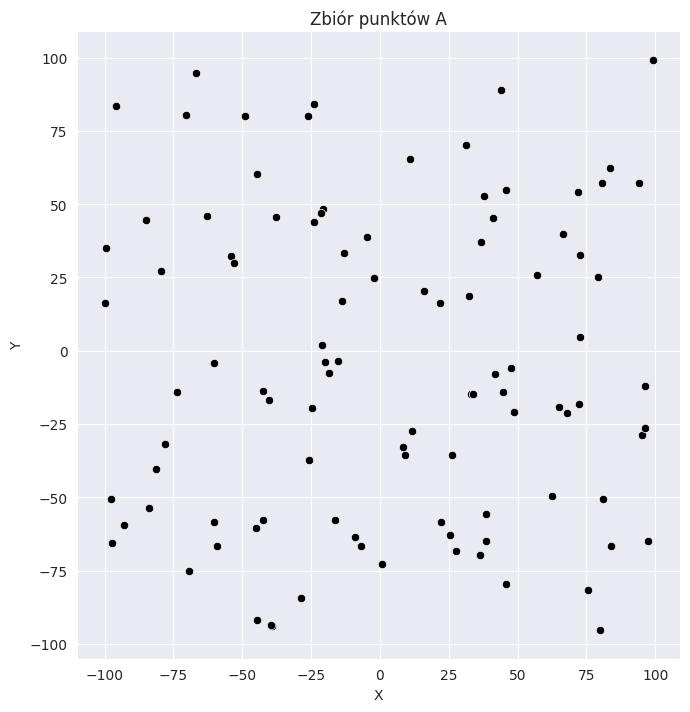

In [8]:
plot_a =sns.relplot(data=table_a ,x='X', y='Y', height=7, color="black").set(title="Zbiór punktów A")

### Zbiór punktów B

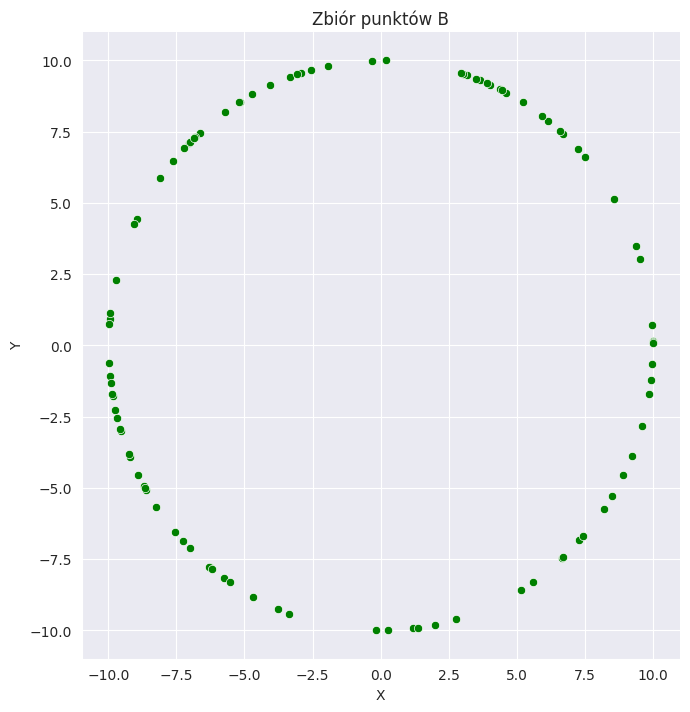

In [9]:
plot_b=sns.relplot(data=table_b, x='X', y='Y', height=7, color="green").set(title="Zbiór punktów B")

### Zbiór punktów C

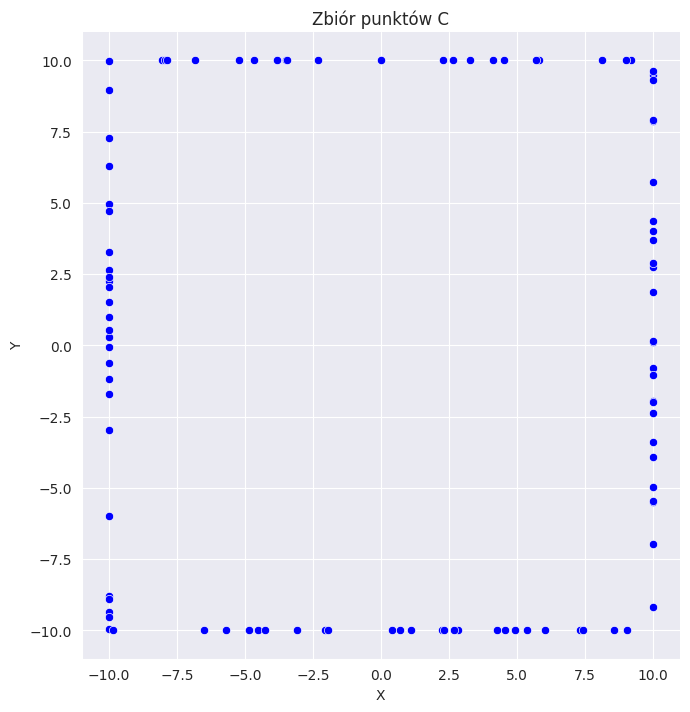

In [10]:
plot_c=sns.relplot(data=table_c, x='X', y='Y', height=7, color="blue").set(title="Zbiór punktów C")

### Zbiór punktów D

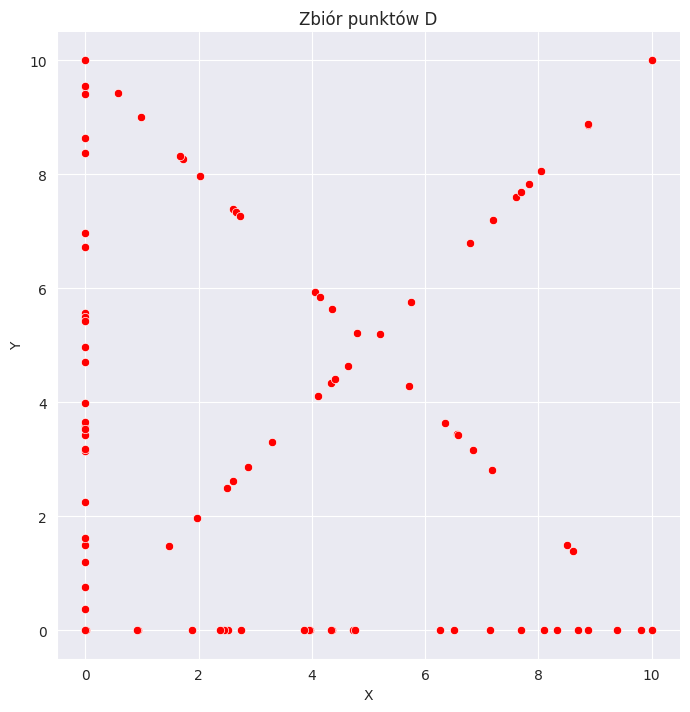

In [11]:
plot_c=sns.relplot(data=table_d, x='X', y='Y', height=7, color="red").set(title="Zbiór punktów D")

# Zadanie 3

Zmodyfikuj program z punktu 1 tak, aby możliwe było zadawanie określonych
parametrów dla schematów losowania punktów podanych powyżej:

a) liczba punktów, przedziały dla współrzędnych,

b) liczba punktów, środek i promień okręgu,

c) liczba punktów, wierzchołki prostokąta,

d) wierzchołki kwadratu, liczba punktów na osiach, liczba punktów na przekątnych.

## a)

In [12]:
def setA(number_of_points, begin,end):
    points_a = np.random.uniform(begin, end, size =[number_of_points, 2])
    table_a = pd.DataFrame(data=points_a, columns=['X', 'Y'])
    return table_a

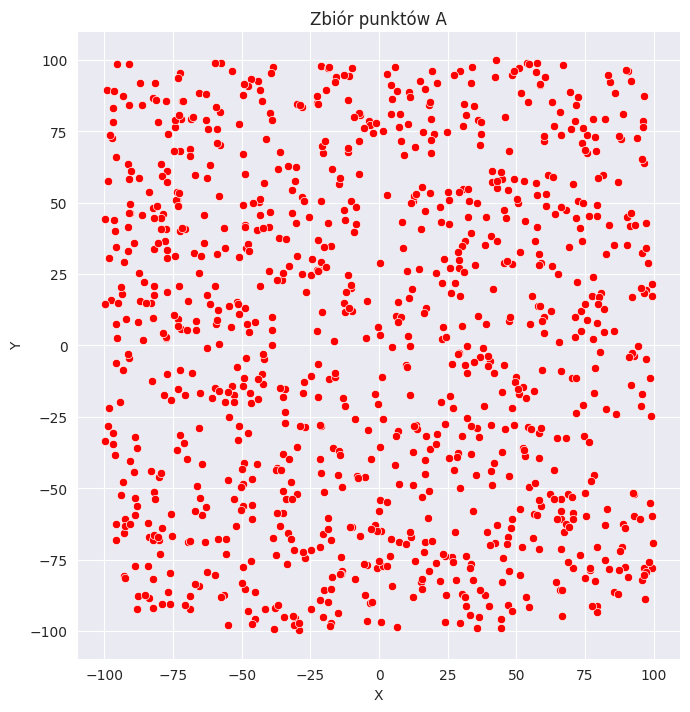

In [13]:
table=setA(1000,-100,100)
sns.relplot(data=table, x='X', y='Y', height=7, color="red").set(title="Zbiór punktów A")

## b)

In [14]:
def setB(number_of_points, center, radius):
    points_b=[None for _ in range(number_of_points)]
    for i in range(number_of_points):
        angle=np.random.uniform(0, 2*np.pi)
        x=np.cos(angle)*radius + center[0]
        y=np.sin(angle)*radius + center[1]
        points_b[i]=(x,y)
    table_b=pd.DataFrame(data=points_b, columns=['X','Y'])
    return table_b

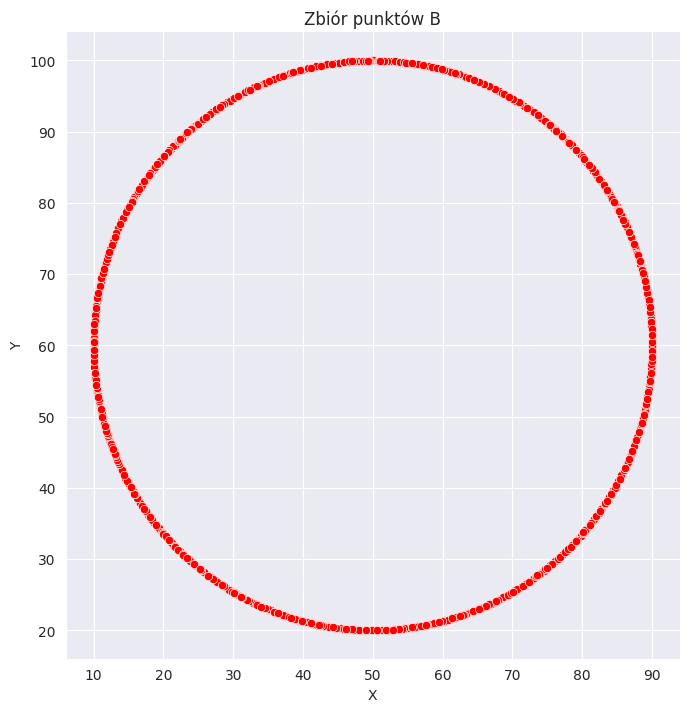

In [15]:
table=setB(10000,(50,60),40)
sns.relplot(data=table, x='X', y='Y', height=7, color="red").set(title="Zbiór punktów B")

## c)

In [16]:
def setC(number_of_points, lowerLeft, upperRight):
    points_c=[[None,None] for _ in range(number_of_points)]
    xL=lowerLeft[0]
    xR=upperRight[0]
    yL=lowerLeft[1]
    yR=upperRight[1]
    
    for i in range(number_of_points):
        n = np.random.randint(0,4)
        if n==0:
            points_c[i][0]=xL
            points_c[i][1]=np.random.uniform(yL,yR)
            while points_c[i][1]==yR or points_c[i][1]==yL:
                points_c[i][1]=np.random.uniform(yL,yR)
            
        elif n==1:
            points_c[i][0]=xR
            points_c[i][1]=np.random.uniform(yL,yR)
            while points_c[i][1]==yR or points_c[i][1]==yL:
                points_c[i][1]=np.random.uniform(yL,yR)
            
            
        elif n==2:
            points_c[i][1]=yL
            points_c[i][0]=np.random.uniform(xL,xR)
            while points_c[i][0]==xR or points_c[i][0]==xL:
                points_c[i][0]=np.random.uniform(xL,xR)
            
            
        else:
            points_c[i][1]=yR
            points_c[i][0]=np.random.uniform(xL,xR)
            while points_c[i][0]==xR or points_c[i][0]==xL:
                points_c[i][0]=np.random.uniform(xL,xR)

    table_c=pd.DataFrame(data=points_c, columns=['X','Y'])
    return table_c

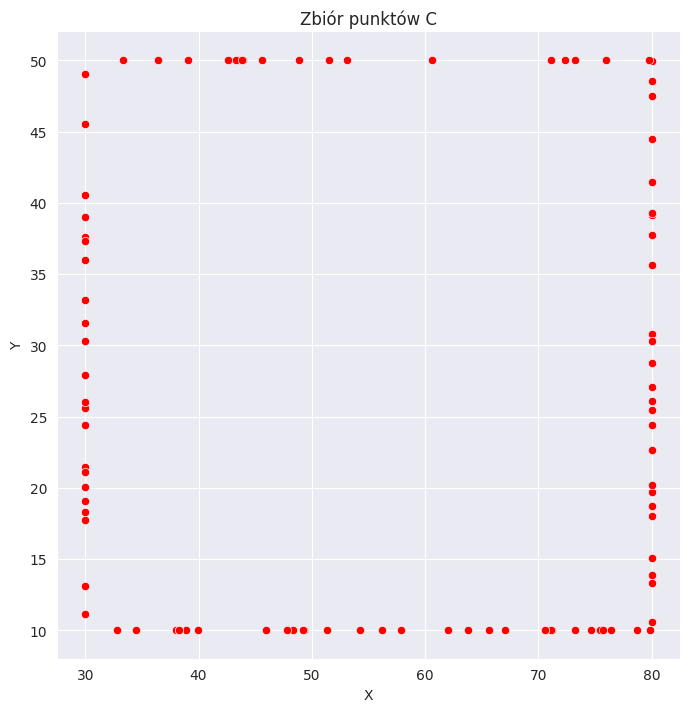

In [17]:
table=setC(100, (30,10), (80,50))
sns.relplot(data=table, x='X', y='Y', height=7, color="red").set(title="Zbiór punktów C")

## d)

In [18]:
# lewym dolnym wierzchołkiem jest zawsze punkt (0,0)
def setD(upperRight, axis, borders):
    points_d=[ [None, None] for _ in range(axis+borders+4)]
    
    for j in range(axis):
        n=np.random.randint(0,2)
        if n==0:
            points_d[j][0]=0
            points_d[j][1]=np.random.uniform(0,upperRight[1])       
        elif n==1:
            points_d[j][n]=0
            points_d[j][1-n]=np.random.uniform(0,upperRight[0])
    
    for j in range(axis, axis+borders):
        n=np.random.randint(0,2)
        x=np.random.uniform(0,upperRight[0])
        if n==0:
            points_d[j][0]=x
            points_d[j][1]=x       
        elif n==1:
            points_d[j][0]=x
            points_d[j][1]=-x+upperRight[1]

    points_d[axis+borders]=[0,0]
    points_d[axis+borders+1]=[upperRight[0],0]
    points_d[axis+borders+2]=[upperRight[0],upperRight[1]]
    points_d[axis+borders+3]=[0,upperRight[1]]

    table_d=pd.DataFrame(data=points_d, columns=['X','Y'])
    return table_d

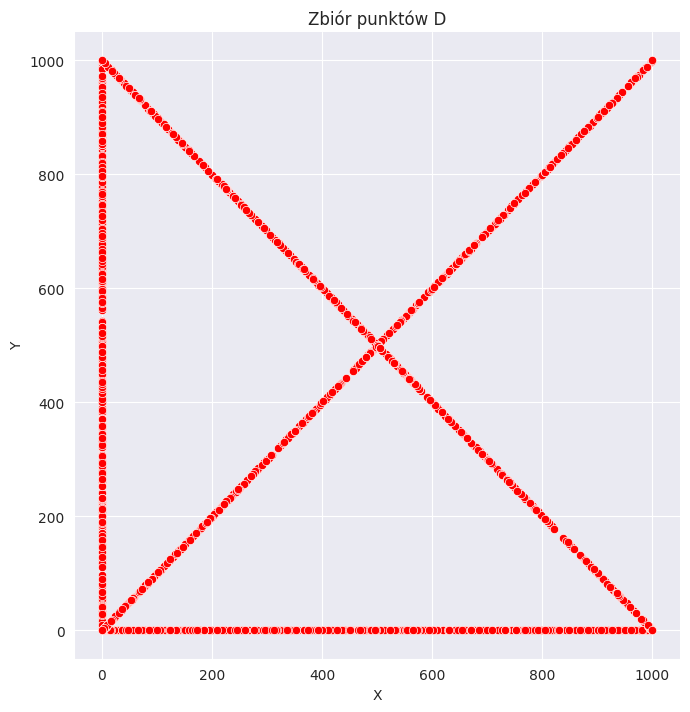

In [19]:
table=setD((1000,1000), 1000, 1000)
sns.relplot(data=table, x='X', y='Y', height=7, color="red").set(title="Zbiór punktów D")

# Zadanie 4

Zaimplementuj algorytmy Grahama oraz Jarvisa wyznaczające otoczkę wypukłą dla
zadanego zbioru punktów. Przetestuj program na zbiorach z punktu 1 oraz
zmodyfikowanych zbiorach z punktu 3. Program powinien pozwolić na zapisanie w
pliku wyniku działania, czyli ciągu wierzchołków otoczki. Dodaj możliwość
sprawdzenia czasu działania algorytmu.

## Funkcje wizualizujące działanie algorytmu

In [20]:
def makeplot(points, ch, title=None, filename=None, SAVE=False):
    x=points['X']
    y=points['Y']
    plt.scatter(x,y, color='black')
    x_ch=ch[0][:-1]
    y_ch=ch[1][:-1]
    plt.plot(x_ch, y_ch, '-o', color='blue')
    plt.plot(ch[0][-2:], ch[1][-2:], '-o', color='red')
    plt.title(title)
    if SAVE:
        plt.savefig(directory+filename)
    plt.show()

In [65]:
def makefinalplot(points,ch,title=None,filename=None,SAVE=False, jarvis=False):
    c='blue'
    if jarvis:
        c='green'
    x=points['X']
    y=points['Y']
    plt.scatter(x,y, color='black')
    x_ch=ch[0]
    y_ch=ch[1]
    ch[0].append(ch[0][0])
    ch[1].append(ch[1][0])
    plt.plot(x_ch, y_ch, '-o', color=c)
    plt.title(title)
    if SAVE:
        plt.savefig(directory+filename)
    plt.show()

### Stałe:

In [22]:
# Epsilon for det function
epsilon = 10**(-12)

### Funkcje pomocniczne:

In [23]:
def matrix_2x2(a,b,c):
    return [[a[0]-c[0], a[1]-c[1]], [ b[0]-c[0], b[1]-c[1]]]

def det_2x2(a,b,c):
    matrix=matrix_2x2(a,b,c)
    return (matrix[0][0]*matrix[1][1])-(matrix[0][1]*matrix[1][0])

def orientation(a,b,c):
    det = det_2x2(a,b,c)
    if det > epsilon:
        return 1
    elif det <-epsilon:
        return -1
    return 0

In [24]:
def distance(a,b):
    return np.sqrt((b[0]-a[0])**2+(b[1]-a[1])**2)

def partition(array, low, high, a):
    pivot = array[high]
    i = low - 1
    for j in range(low, high):
        if (orientation(a,array[j],pivot)==1) or (orientation(a,array[j],pivot)==0 and distance(a,array[j])>distance(a,pivot)):
            i = i + 1
            array[i], array[j] = array[j], array[i]
        
    array[i + 1], array[high] = array[high], array[i + 1]
    return i + 1 

def quickSort(array, low, high, a):
    if low < high:
        pi = partition(array, low, high,a)
        quickSort(array, low, pi - 1, a)
        quickSort(array, pi + 1, high, a)

## Algorytm Grahama

In [48]:
def most_left_point(table):
    index=0
    left_point=[np.inf,np.inf]
    for i in range(len(table)):
        x=table.loc[i,'X']
        y=table.loc[i,'Y']
        if x<left_point[0]:
            left_point[0]=x
            left_point[1]=y
            index=i
        elif x==left_point[0] and y<left_point[1]:
            left_point[1]=y
            index=i        
    return left_point, index

def graham_algorithm(table, show_steps=False, final_plot=None, save_plots=False, measure_time=False, save_file=False):
    
    first_point, index= most_left_point(table)
    points=[]
    for i in range(len(table)):
        points.append((table.loc[i,'X'], table.loc[i,'Y']))
    
    if measure_time:
        start=time.time()
        
    quickSort(points,0,len(points)-1,first_point)
    ch=[[points[0][0],points[1][0],points[2][0]],[points[0][1],points[1][1],points[2][1]]]
    
    i=3
    while i < len(points):
        removed=False
        point=points[i]
        orient=orientation((ch[0][-2],ch[1][-2]), (ch[0][-1],ch[1][-1]), point)
        if orient==0:
            ch[0].pop()
            ch[1].pop()
            ch[0].append(point[0])
            ch[1].append(point[1])
            i+=1
        elif orient==1:
            ch[0].append(point[0])
            ch[1].append(point[1])
            i+=1
        else:
            ch[0].pop()
            ch[1].pop()
            removed=True
            
        if len(ch[0])==1:
            ch[0].append(point[0])
            ch[1].append(point[1])
            i+=1
            
        if show_steps and not removed:
            makeplot(table,ch,title=str(final_plot),filename=str(final_plot)+" i", SAVE=save_plots)
    if measure_time:
        end=time.time()

    if final_plot:
        makefinalplot(table,ch,title=str(final_plot),filename=str(final_plot), SAVE=save_plots)
        ch[0]=ch[0][:-1]
        ch[1]=ch[1][:-1]
    if save_file:
        convex_hull=pd.DataFrame()
        convex_hull['X']=ch[0]
        convex_hull['Y']=ch[1]
        convex_hull.to_csv(directory+final_plot+"_summary.csv", index=False)
        
    if measure_time:
        return ch, "{0:.5f}".format(end-start)
    return ch

# Algorytm Jarvisa

In [60]:
def the_lowest_point(table):
    index=0
    left_point=[np.inf,np.inf]
    for i in range(len(table)):
        x=table.loc[i,'X']
        y=table.loc[i,'Y']
        if y<left_point[1]:
            left_point[0]=x
            left_point[1]=y
            index=i
        elif y==left_point[1] and x<left_point[0]:
            left_point[0]=x
            index=i        
    return index

def jarvis_algorithm(table, show_steps=False, final_plot=None, save_plots=False, measure_time=False, save_file=False): 
    points=[]
    for i in range(len(table)):
        points.append([table.loc[i,'X'], table.loc[i,'Y']])
    if measure_time:
        start=time.time()
    
    index=the_lowest_point(table)
    
    hull=[[],[]]
    p = index
    q = 0
    while(True):
        hull[0].append(points[p][0])
        hull[1].append(points[p][1])
        q =(p+1)%len(points)
        for i in range(len(points)):
            if(orientation(points[p],points[i], points[q]) == 1):
                q = i
        p = q
        if show_steps:
            makeplot(table,hull,filename=final_plot, SAVE=save_plots)
        if(p == index):
            break
    
    if measure_time:
        end=time.time()
    if final_plot:
        makefinalplot(table,hull,title=final_plot, filename=str(final_plot), SAVE=save_plots, jarvis=True)
        hull[0]=hull[0][:-1]
        hull[1]=hull[1][:-1]
    
    if save_file:
        convex_hull=pd.DataFrame()
        convex_hull['X']=hull[0]
        convex_hull['Y']=hull[1]
        convex_hull.to_csv(directory+final_plot+"_summary.csv", index=False)
    
    if measure_time:
        return hull, "{0:.5f}".format(end-start)
    return hull

## Wizualizacja otoczki dla zbiorów A,B,C,D

## Graham:

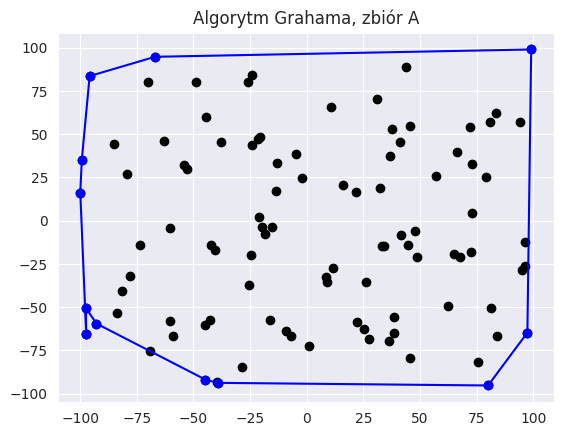

([[-97.34846206412577,
   -97.49528315555851,
   -92.80481155172677,
   -44.7336883238632,
   -39.19348294747715,
   80.03392114500434,
   97.39746415057212,
   99.06973334892794,
   -66.9653849521664,
   -95.83062447928697,
   -99.30335925614757,
   -99.9661125440534],
  [-65.63920479830884,
   -50.50018344520786,
   -59.51946101026226,
   -91.92327072427078,
   -93.79195224085792,
   -95.31140249784814,
   -64.73004259937076,
   99.01769227831986,
   94.78383394662472,
   83.64095016190066,
   35.06071209765631,
   16.190460272816892]],
 '0.00393')

In [70]:
graham_algorithm(table_a,final_plot="Algorytm Grahama, zbiór A", save_plots=True, measure_time=True,save_file=True)

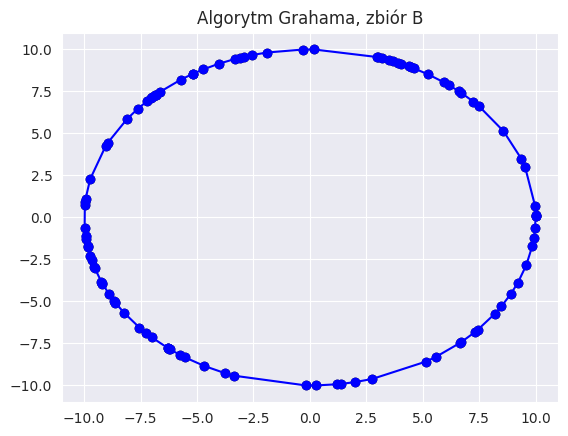

([[-9.941645587157335,
   -9.914395891367512,
   -9.851918087888984,
   -9.840040322418904,
   -9.738812671389997,
   -9.670421255257471,
   -9.561891151300994,
   -9.536480219635406,
   -9.241823512328644,
   -9.213776406934977,
   -9.19367828282821,
   -8.910025951893276,
   -8.689045121824574,
   -8.65586799262266,
   -8.6246053984886,
   -8.240903232482117,
   -7.552148997579425,
   -7.2569393153537645,
   -7.015304016781765,
   -6.293758803830645,
   -6.28393902173727,
   -6.252128252832023,
   -6.185671578540756,
   -5.769739548953462,
   -5.5447295294724555,
   -4.6716750091255825,
   -3.757681781118177,
   -3.3713699299866757,
   -0.15932624020479982,
   0.27154047999760655,
   1.2029873024524063,
   1.377742005617222,
   1.9858994391187985,
   2.762456512962695,
   5.140250546507014,
   5.594714273492664,
   6.654894905902914,
   6.7031897549805395,
   7.295886874218081,
   7.435165702920149,
   8.196213403385613,
   8.489158504975741,
   8.909914164548365,
   9.21820597469012

In [71]:
graham_algorithm(table_b,final_plot="Algorytm Grahama, zbiór B", save_plots=True, measure_time=True, save_file=True)

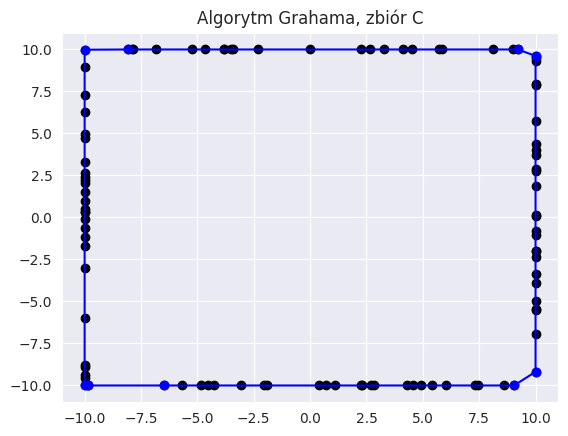

([[-9.833031716176947,
   -6.499584411825115,
   9.051580447242038,
   10.0,
   10.0,
   9.212073375794784,
   -8.05595424994821,
   -10.0,
   -10.0],
  [-10.0,
   -10.0,
   -10.0,
   -9.181053197442829,
   9.619360584758486,
   10.0,
   10.0,
   9.98449695897287,
   -9.955390966219833]],
 '0.00686')

In [72]:
graham_algorithm(table_c,final_plot="Algorytm Grahama, zbiór C", save_plots=True, measure_time=True, save_file=True)

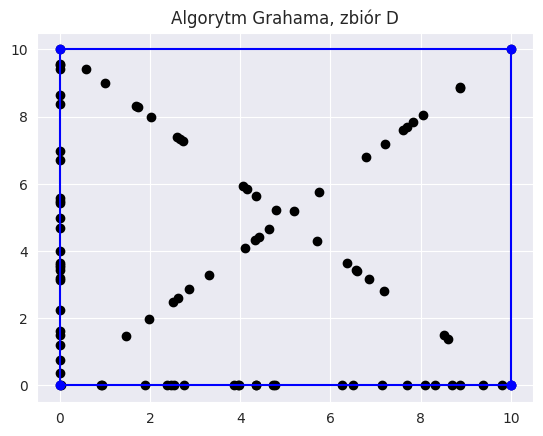

([[10.0, 10.0, 0.0, 0.0], [0.0, 10.0, 10.0, 0.0]], '0.00260')

In [73]:
graham_algorithm(table_d,final_plot="Algorytm Grahama, zbiór D", save_plots=True, measure_time=True, save_file=True)

## Jarvis:

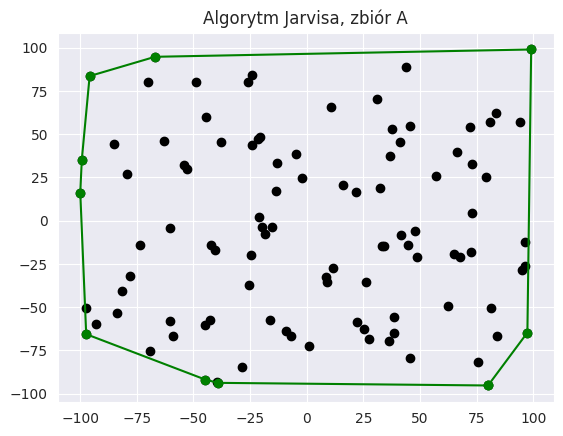

([[80.03392114500434,
   97.39746415057212,
   99.06973334892794,
   -66.9653849521664,
   -95.83062447928697,
   -99.30335925614757,
   -99.9661125440534,
   -97.34846206412577,
   -44.7336883238632,
   -39.19348294747715],
  [-95.31140249784814,
   -64.73004259937076,
   99.01769227831986,
   94.78383394662472,
   83.64095016190066,
   35.06071209765631,
   16.190460272816892,
   -65.63920479830884,
   -91.92327072427078,
   -93.79195224085792]],
 '0.00840')

In [66]:
jarvis_algorithm(table_a,final_plot="Algorytm Jarvisa, zbiór A", save_plots=True, measure_time=True, save_file=True)

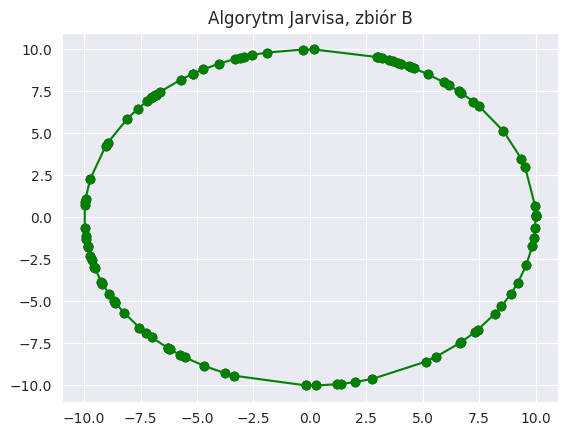

([[-0.15932624020479982,
   0.27154047999760655,
   1.2029873024524063,
   1.377742005617222,
   1.9858994391187985,
   2.762456512962695,
   5.140250546507014,
   5.594714273492664,
   6.654894905902914,
   6.7031897549805395,
   7.295886874218081,
   7.435165702920149,
   8.196213403385613,
   8.489158504975741,
   8.909914164548365,
   9.218205974690129,
   9.58738316243544,
   9.854434936047884,
   9.923866716146206,
   9.978906862085351,
   9.99960192105089,
   9.99947907935736,
   9.998682239569593,
   9.974978111652987,
   9.533330251467508,
   9.373860859556453,
   8.577546284545024,
   7.497888643733094,
   7.241567233115063,
   6.71264059057398,
   6.593885111860845,
   6.152978686760756,
   5.9468865412211835,
   5.217817687993817,
   4.615280817595577,
   4.460504147761652,
   4.374414241942954,
   4.032808866187753,
   3.909236934045652,
   3.6614023544169565,
   3.521215491309614,
   3.189046589253928,
   3.0130598432708533,
   2.9626428116984416,
   0.18453817676167175,


In [67]:
jarvis_algorithm(table_b,final_plot="Algorytm Jarvisa, zbiór B", save_plots=True, measure_time=True, save_file=True)

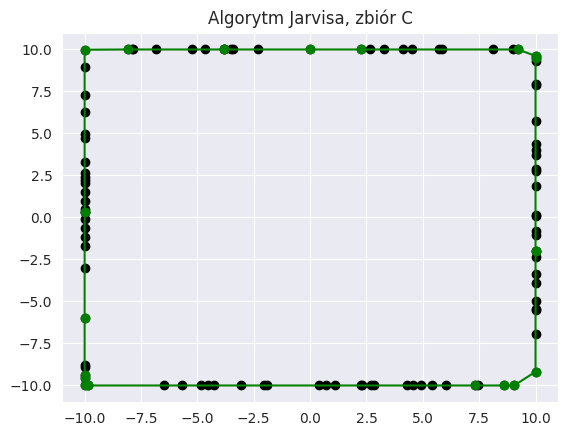

([[-9.833031716176947,
   7.33441749282558,
   8.590370529445046,
   9.051580447242038,
   10.0,
   10.0,
   10.0,
   10.0,
   9.212073375794784,
   2.27461732013235,
   0.01256765363640433,
   -3.8108667923058697,
   -3.834639895635026,
   -8.05595424994821,
   -10.0,
   -10.0,
   -10.0,
   -10.0,
   -10.0,
   -10.0],
  [-10.0,
   -10.0,
   -10.0,
   -10.0,
   -9.181053197442829,
   -1.9676632480618181,
   9.496936228286337,
   9.619360584758486,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   9.98449695897287,
   0.30034136363527253,
   -5.985944936030927,
   -9.354835480153103,
   -9.543306215002021,
   -9.955390966219833]],
 '0.02616')

In [68]:
jarvis_algorithm(table_c,final_plot="Algorytm Jarvisa, zbiór C", save_plots=True, measure_time=True, save_file=True)

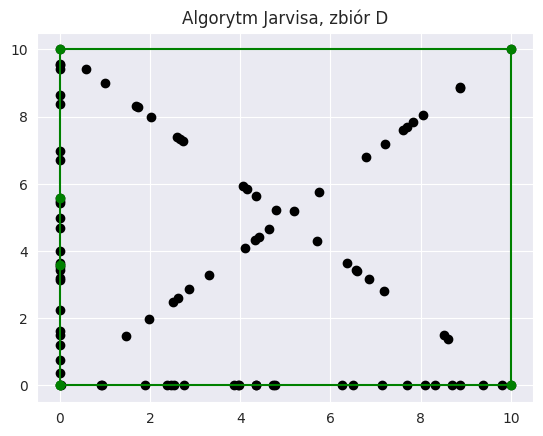

([[0.0, 10.0, 10.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 10.0, 10.0, 5.571415097311283, 3.5924930423366632]],
 '0.00686')

In [69]:
jarvis_algorithm(table_d,final_plot="Algorytm Jarvisa, zbiór D", save_plots=True, measure_time=True, save_file=True)

# Wizualizacja algorytmu dla pomniejszonych zbiorów A,B,C,D

### Pomniejszony zbiór A

In [74]:
dataA=setA(20,-10,10)

### Pomniejszony zbiór B

In [ ]:
dataB=setB()

### Pomniejszony zbiór C

In [ ]:
dataC=setC()

### Pomniejszony zbiór D

In [ ]:
dataD=setD